# Visualization of inversion

In [33]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.stats as sp

from fatiando.vis import mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [35]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import plot_functions as pf

In [36]:
mypath = 'results/single-test/'

In [37]:
with open(mypath+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [38]:
xp = inversion['xp']
yp = inversion['yp']
zp = inversion['zp']
dobs = inversion['observed_data']
N = xp.size

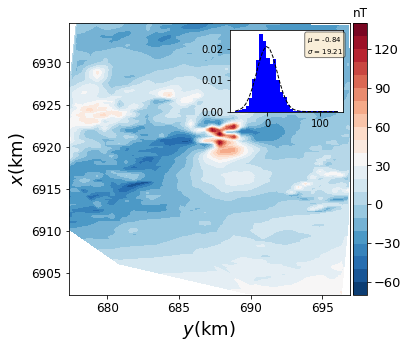

In [39]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(yp, xp, inversion['residual'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(xp), np.max(xp))
#plt.ylim(np.min(yp), np.max(yp))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

plt.show()
#img(filename=mypath+'diorama_tfa_residual.png', width=1600, height=400)

In [40]:
x = inversion['xp']/1000.
y = inversion['yp']/1000.
z = inversion['zp']/1000.

In [41]:
verts = pf.plot_prisms(inversion['prisms'], 0.001)
verts_initial = pf.plot_prisms(inversion['initial_estimate'], 0.001)

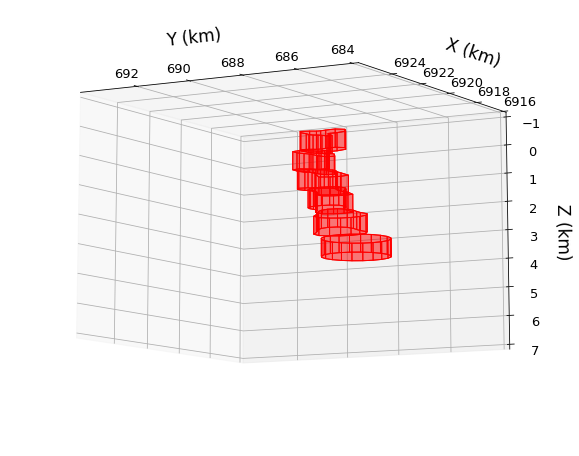

In [42]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(684, 694)
ax.set_ylim(6916, 6926)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticks(np.arange(684, 694,2))
ax.set_yticks(np.arange(6916, 6926,2))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()